In [1]:
from __future__ import print_function, division
import os
import torch
import pandas as pd
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils


In [18]:
class RetinaDataset(Dataset):
    
    def __init__(self, file_path, transform=None):
        self.image_list = os.listdir(os.getcwd() + file_path)
        self.root_dir = os.getcwd()+file_path
        self.transform = transform
    
    def __len__(self):
        return len(self.image_list)
    
    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        img_name = os.path.join(self.root_dir,
                                self.image_list[idx])
        sample_im = io.imread(img_name)
        #landmarks = self.landmarks_frame.iloc[idx, 1:]
        #landmarks = np.array([landmarks])
        #landmarks = landmarks.astype('float').reshape(-1, 2)
        sample = {'sample': sample_im}

        if self.transform:
            sample = self.transform(sample)

        return sample

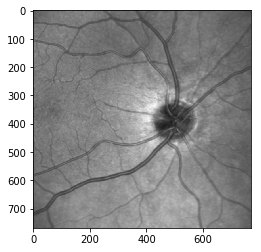

In [21]:
test = RetinaDataset(file_path="/data/targets")
sample = test[0]
plt.imshow(sample['target'])
plt.show()